## Esercizio 4.01 - 4.02
Per inludere il calcolo della distribuzione delle velocità ho modificato il codice del file system.cpp in 3 punti:
- Innanzitutto in measure() ho implementato la creazione dei bin per creare la probability of velocity del sistema. Per farlo ho calcolato il modulo della velocità e l'ho messa nel vettore _measurement all'indice corrispondente: _index_pofv + int(v/_bin_size_v). Bisogna stare attenti che se la v/_bins_size_v è meggiore di _n_bin_v la velocità cadreebbe fuori dall'istogramma, allora ho deciso di mettere tutte queste velocità nell'ultimo bin, ma si potrebbe anche decidere di cancellare quei valori.
- in avereges() calcoliamo la media a blocchi e salviamo i dati in un file. Salviamo l'indice del blocco, la velocità corrispondente al bin, il valor medio del numero di elementi in quel bin corrispondenta a quella velocità e l'errore. 
- stabilire la velocità meassima della distribuzione dentro a inizialize_proprerties(): per far questo inizialmente ho plottato la distribuzione che ottenevo lasciando 4*_temp e vedevo che da 5 in poi la distribuzione si appiattiva. quindi ho fissato la v_max a 5. Per calcolare più accuratatemnte il valore di v_max Ho calcolato il valor massimo della velocità come <v> + 3 $\sigma$. 

Il valor medio lo calcolo come:

$ <v> = \int_0^{\infty} dv^*  v^* p(v^*,T^*) = 1.6 \sqrt(T^*)$

La $\sigma$ come:

$\sigma = <v^2> - <v>^2$, 

dove $<v^2>$ deriva dall'uguaglianza dell'energia cinetica con l'equipartizione dell'energia: $\frac{{v^*}^2}{2} = \frac{3 T^*}{2}$

Bisogna poi normalizzare la distribuzione ottenuta in modo da poterla confronare con al distribuzione di Maxwell-Boltzman delle velocità:
$$p(v^*,T^*) = \frac{1}{(2\pi T^*)^{3/2}} 4\pi (v^*)^2 e^{-\frac{(v^*)^2}{2 T^*}}$$

Per normalizzare dividiamo le ordinate per _n_part*_bin_size_v, che è un'approssimazione dell'area della distribuzione ottenuta. 


Facciamo evolvere il sistema partendo da uno stato a bassa entropia partendo da una configurazione di un cristallo FCC con velocità distribuite con una probabilità: $p_\delta(v^*,T^*) = \delta\left( v^* - v_{T^*}\right)$, dove $v_{T^*}$ è la velocità media calcolata come detto sopra.

Plottando tutti frame insieme vediamo che la distribuzione delle velocità evolve dalla delta verso alla distribuzione di Maxwell-Boltzman.

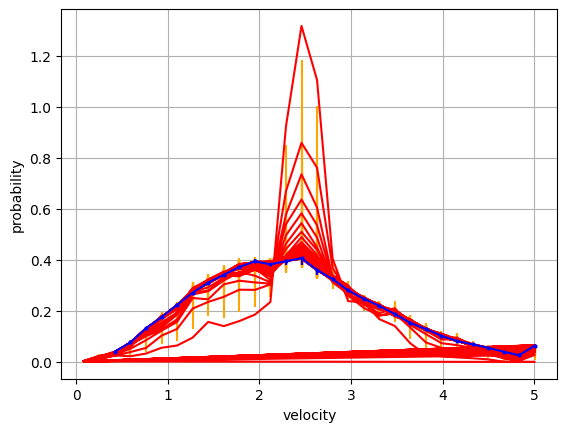

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

pofv = np.loadtxt("NSL_SIMULATOR/OUTPUT/pofv.dat")
v = pofv[:,1]
prob = pofv[:,2]
err = pofv[:,3]

prob /= (108*0.17)
err /= (108*0.17)

plt.figure(1)
plt.errorbar(v,prob,err, ecolor= 'orange' ,color='red')
plt.xlabel('velocity')
plt.ylabel('probability')
plt.grid(True)

#ultimo frame della simulazione
v_last = pofv[1172:1201,1]
prob_last = pofv[1172:1201,2]
err_last = pofv[1172:1201,3]
 
plt.figure(1)
plt.errorbar(v_last, prob_last,err_last, marker = 'o', markersize = '2',color='blue', label = 'probability distribution')
plt.xlabel('velocity')
plt.ylabel('probability')
plt.grid(True)

[914.30433679   1.        ]


/tmp/ipykernel_3233/3499639833.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(probability, v_last, prob_last, p0=[2,1] )
/tmp/ipykernel_3233/3499639833.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_fit,y_fit, 'g--', label = 'Fit', color="blue")


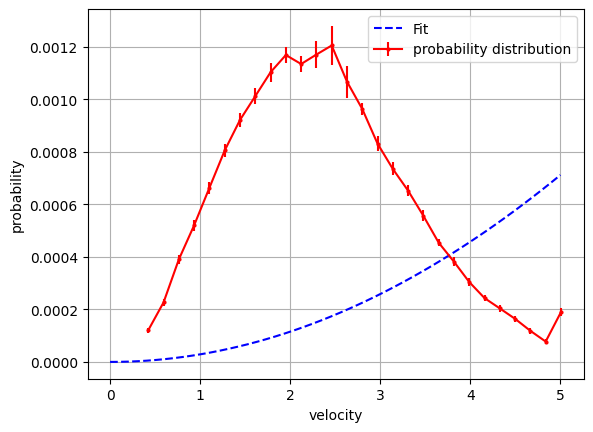

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def probability(x, a, b):
    return 2 * x**2 * np.exp((-x**2)/(2*a)) /(np.sqrt(2*np.pi*(a**3)))

#ultimo frame:
v_last = pofv[1172:1201,1]
prob_last = pofv[1172:1201,2]
err_last = pofv[1172:1201,3]
normalization = np.sum(prob_last)
prob_last /= (108*0.17)
err_last /= (108*0.17)
 
plt.figure(2)
plt.errorbar(v_last, prob_last,err_last, marker = 'o', markersize = '2',color='red', label = 'probability distribution')
plt.xlabel('velocity')
plt.ylabel('probability')
plt.grid(True)
# Fit della curva
popt, pcov = curve_fit(probability, v_last, prob_last, p0=[2,1] )

# Estraiamo i parametri ottimizzati
a_fit = popt
print(popt)

# Creiamo i dati della curva fittata
x_fit = np.linspace(0, 5)
y_fit = probability(x_fit, *popt)
plt.plot(x_fit,y_fit, 'g--', label = 'Fit', color="blue")

plt.legend()